In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder#处理分类数据的类
from sklearn.metrics import confusion_matrix, precision_score,accuracy_score, recall_score, f1_score
#分类结果的判别方法:混淆矩阵判别准确率,查准率,查全率,f1-score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis#lda的类
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis#qda的类
import matplotlib.pyplot as plt#画图的库

* 数据展示与描述性统计

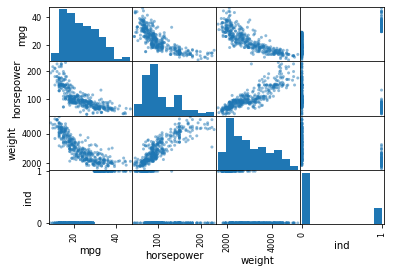

In [3]:
data=pd.read_csv('auto.csv')
pd.plotting.scatter_matrix(data)
plt.show()#画出smarket数据集各个变量的散点图

In [4]:
data

,mpg,horsepower,weight,ind
0,18.0,130,3504,0
1,15.0,165,3693,0
2,18.0,150,3436,0
3,16.0,150,3433,0
4,17.0,140,3449,0
...,...,...,...,...
387,27.0,86,2790,0
388,44.0,52,2130,1
389,32.0,84,2295,1
390,28.0,79,2625,0


* 划分训练集和预测集

这里先对原数据集进行shuffle，然后按顺序取前300个样本为训练集，达到随机划分训练集和测试集的效果

In [5]:
np.random.seed(123)
permutation=np.random.permutation(data.shape[0])#对原数据集的样本的先后顺序进行随机调整
data=data.loc[permutation]
train=data[0:300] #取前300个为训练集，剩余为测试集
test=data[300:]
data.head(5)

,mpg,horsepower,weight,ind
220,17.0,110,4060,0
245,39.4,70,2070,1
134,16.0,140,4141,0
147,24.0,97,2489,0
390,28.0,79,2625,0


In [6]:
#样本特征和样本标签
X_train=train.iloc[:,0:3]
X_test=test.iloc[:,0:3]
y_train=train[['ind']]
y_test=test[['ind']]

# 利用库函数实现

* lda模型训练与预测结果

In [7]:
clf = LinearDiscriminantAnalysis(solver='eigen')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test) #直接得到预测标签
C1= confusion_matrix(y_test, y_pred, labels=[0,1]) #计算混淆矩阵
print(C1) 
print('混淆矩阵判别准确率,查准率,查全率,f1-score依次为')
print(accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred))

[[70  1]
 [ 0 21]]
混淆矩阵判别准确率,查准率,查全率,f1-score依次为
0.9891304347826086 0.9545454545454546 1.0 0.9767441860465117


In [8]:
print('投影向量',clf.coef_)

投影向量 [[0.98177576 0.0354897  0.00148405]]


In [9]:
#help(LinearDiscriminantAnalysis)

In [10]:
prob_pred=clf.predict_proba(X_test)
prob_pred[0:5,] #预测每个样本分为0类和1类的概率,只显示前5个样本的结果

array([[9.86923143e-01, 1.30768567e-02],
       [9.99917014e-01, 8.29860485e-05],
       [9.90866309e-01, 9.13369106e-03],
       [9.99973423e-01, 2.65772512e-05],
       [7.25396912e-01, 2.74603088e-01]])

In [11]:
y_pred=prob_pred[:,1]>0.5  #第二列是分为1类的概率，如果大于0.5则表示True,而True逻辑符号参与运算时对应1，False逻辑符号参与运算时对应0
print('混淆矩阵判别准确率,查准率,查全率,f1-score依次为')
print(accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred))

混淆矩阵判别准确率,查准率,查全率,f1-score依次为
0.9891304347826086 0.9545454545454546 1.0 0.9767441860465117


* qda模型训练以及预测结果

In [12]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test) #直接得到预测标签
C2= confusion_matrix(y_test, y_pred, labels=[0,1])#计算混淆矩阵
print(C2) 
print('混淆矩阵判别准确率,查准率,查全率,f1-score依次为')
print(accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred))

[[69  2]
 [ 0 21]]
混淆矩阵判别准确率,查准率,查全率,f1-score依次为
0.9782608695652174 0.9130434782608695 1.0 0.9545454545454545


# 根据lda原理实现

关于lda线性判别分析的参考资料https://zhuanlan.zhihu.com/p/137968371

In [13]:
#将训练集中0类和1类分开
index1=np.array(y_train[['ind']])[:,0]==1
index0=np.array(y_train[['ind']])[:,0]==0
X_train1=X_train.loc[index1]
X_train0=X_train.loc[index0]
y_train1=y_train.loc[index1]
y_train0=y_train.loc[index0]

In [14]:
#计算每一类的类均值
mu1=np.array(X_train1.apply(lambda x: x.mean()))
mu0=np.array(X_train0.apply(lambda x: x.mean()))
print('1类的类均值为：',mu1)
print('0类的类均值为：',mu0)

1类的类均值为： [  34.4472973    70.72972973 2146.21621622]
0类的类均值为： [  19.9380531   116.07964602 3261.19026549]


In [17]:
#计算类内方差矩阵
mu1_matrix=np.array(X_train1.apply(lambda x:  x-x.mean()))#样本数据减去对应1类的样本均值得到的矩阵
S1=np.dot(mu1_matrix.T,mu1_matrix) #1类，类内方差矩阵
mu0_matrix=np.array(X_train0.apply(lambda x:  x-x.mean()))#样本数据减去对应1类的样本均值得到的矩阵
S0=np.dot(mu0_matrix.T,mu0_matrix) #0类，类内方差矩阵
Sw=S1+S0
Sw_ni=np.linalg.inv(Sw)#求总类内方差矩阵的逆
w=np.dot(Sw_ni,mu1-mu0)#最终投影向量
w=np.array([j/np.sqrt(sum([i**2 for i in w]))for j in w] )#向量归一化
print('投影向量',w)

投影向量 [0.99934614 0.03612484 0.00151061]


In [18]:
mu1_w=np.dot(mu1,w.T)#第1类的均值投影到直线w上的点
mu0_w=np.dot(mu0,w.T)#第0类的均值投影到直线w上的点
divide=0.5*(mu1_w+mu0_w)#取中间点为分界，如果投影值大于divide则划分为1类，如果投影值小于divide则划分为0类
print('1类的均值投影到直线w上的点',mu1_w)
print('0类的均值投影到直线w上的点',mu0_w)

1类的均值投影到直线w上的点 40.22197885438997
0类的均值投影到直线w上的点 29.044775857787258


In [19]:
y_pred=np.dot(X_test,w)>divide
C3= confusion_matrix(y_test, y_pred, labels=[0,1])#计算混淆矩阵
print(C3) 
print('混淆矩阵判别准确率,查准率,查全率,f1-score依次为')
print(accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred))

[[65  6]
 [ 0 21]]
混淆矩阵判别准确率,查准率,查全率,f1-score依次为
0.9347826086956522 0.7777777777777778 1.0 0.8750000000000001


In [20]:
pd.value_counts(y_test.iloc[:,0])

0    71
1    21
Name: ind, dtype: int64